URL Classification Burak Nayır-Yunus Emre Taşkır - Yusuf Özben

In [33]:
!pip install seaborn

In [1]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import sklearn
import seaborn as sns

In [2]:
#Data is imported as csv file to Dataframe
defdir="D:/Mobile proje/alllar"
os.chdir(defdir)
all_=pd.read_csv("all.csv")

C:\Users\Burak\Anaconda3\envs\tf_gpu\lib\site-packages\IPython\core\interactiveshell.py:3058: DtypeWarning: Columns (31) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [3]:
#Useless Features are eliminated
all_.drop(columns=['Entropy_DirectoryName', 'NumberRate_Extension', 'argPathRatio'],inplace=True)


In [4]:
#Nan-Values replaced with mean values
all_.fillna(all_.Entropy_Extension.mean(),inplace=True)
all_.fillna(all_.mean(),inplace=True)

Text(0.5, 1.0, 'Number of None-Empty Rows for Each Feature')

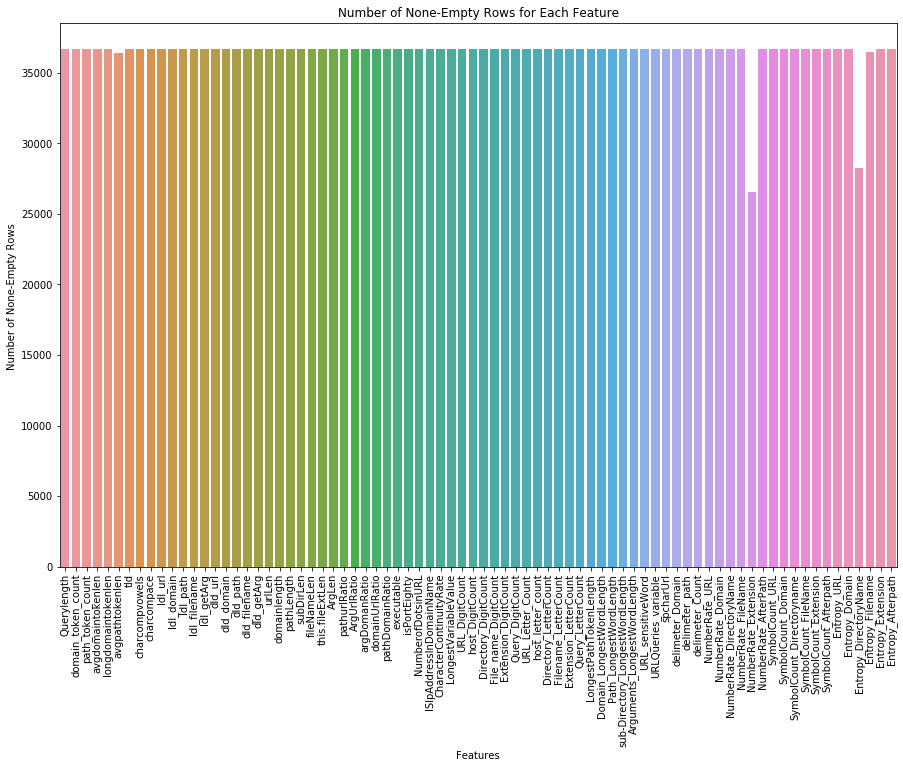

In [39]:
b=all_.describe()
c=b.iloc[0,:]
a=b.columns
c=pd.DataFrame(c)
c=c.iloc[:,0]
plt.figure(figsize=(15,10))
sns.barplot(x=a, y=c)
plt.xticks(rotation= 90)
plt.xlabel('Features')
plt.ylabel('Number of None-Empty Rows ')
plt.title('Number of None-Empty Rows for Each Feature')

In [5]:
#Class Names are encoded in two different formats 
target=all_.loc[:,"URL_Type_obf_Type"]
from sklearn.preprocessing import LabelEncoder
enc = LabelEncoder()
target_label = enc.fit_transform(target)
from keras.utils import to_categorical
target_cate = to_categorical(target_label)


Using TensorFlow backend.
C:\Users\Burak\Anaconda3\envs\tf_gpu\lib\site-packages\tensorflow\python\framework\dtypes.py:516: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
C:\Users\Burak\Anaconda3\envs\tf_gpu\lib\site-packages\tensorflow\python\framework\dtypes.py:517: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
C:\Users\Burak\Anaconda3\envs\tf_gpu\lib\site-packages\tensorflow\python\framework\dtypes.py:518: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
C:\Users\Burak\Anaconda3\envs\tf_gpu\lib\sit

In [6]:
#numpy to Dataframe conversion
target_cate = pd.DataFrame(target_cate)
target_label = pd.DataFrame(target_label)

In [7]:
# renaming classes
target_cate.rename(columns={0:'Defacement',
                          1:'benign',
                          2:'malware',3:'phishing',4:'spam'}, 
                 inplace=True)

In [8]:
#Orginal Target Labels are replaced with One-Hot-Encoding Target Labels
all_.drop(columns=['URL_Type_obf_Type'],inplace=True)
all_["Defacement"]=target_cate["Defacement"]
all_["benign"]=target_cate["benign"]
all_["malware"]=target_cate["malware"]
all_["phishing"]=target_cate["phishing"]
all_["spam"]=target_cate["spam"]

In [9]:
b=all_.corr()
b=b.loc[["Defacement","benign","malware","phishing","spam"],:]


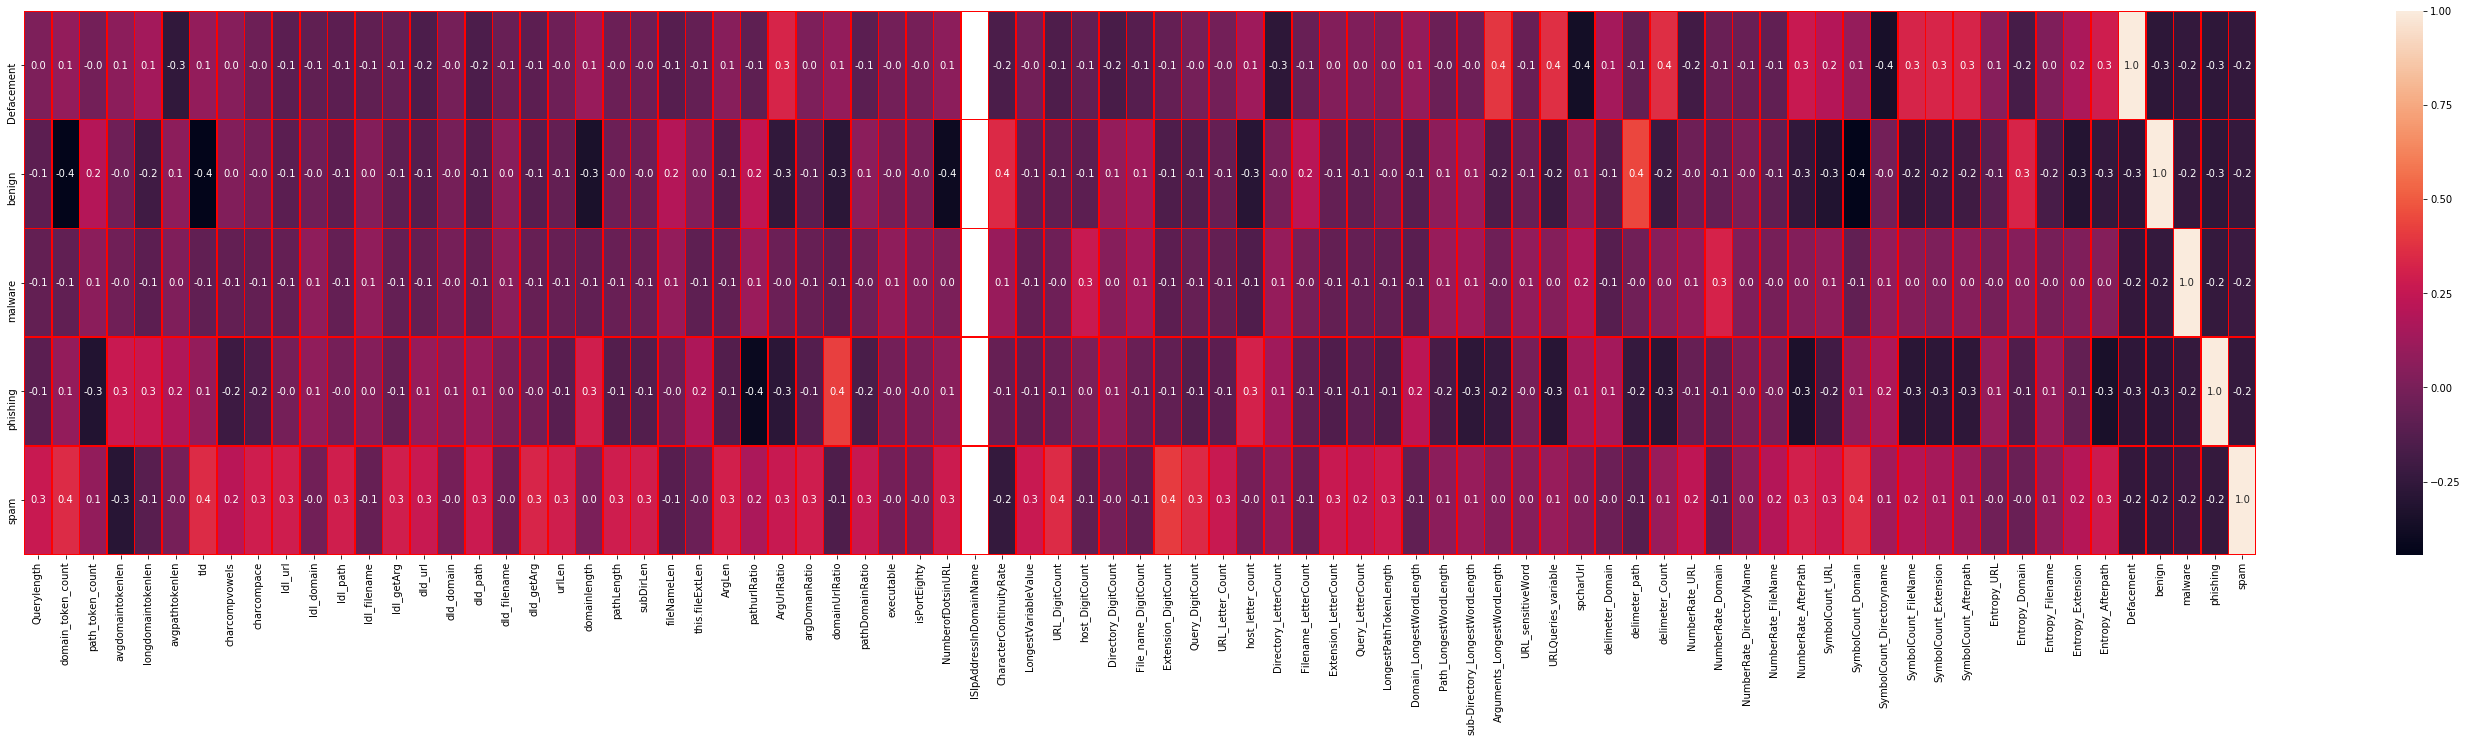

In [10]:
#correlation matrix is extracted 
f,ax = plt.subplots(figsize=(50, 10))
sns.heatmap(b, annot=True, linewidths=0.5,linecolor="red", fmt= '.1f',ax=ax)
plt.show()

In [11]:
#after analysing correlation matrix, useless features are eliminated #34ilocda 0 bul ve dropla
all_.drop(columns=['ldl_filename','dld_filename','executable','isPortEighty','ISIpAddressInDomainName','Filename_LetterCount','Query_LetterCount','Domain_LongestWordLength','URL_sensitiveWord','NumberRate_DirectoryName','NumberRate_FileName','Entropy_URL','Entropy_Filename','Directory_DigitCount',],inplace=True)

In [12]:
#all values normalized
from sklearn import preprocessing

x = all_.values #returns a numpy array
min_max_scaler = preprocessing.MinMaxScaler()
x_scaled = min_max_scaler.fit_transform(x)
all_ = pd.DataFrame(x_scaled)

In [13]:
#Feature matrix is produced
X=all_.iloc[:,0:62]

In [54]:
d = {'methods': ['RFC'],'scores':[0.7689]}
df=pd.DataFrame(d)
d = {'methods': 'KNN','scores':0.795}
df=df.append(d,ignore_index=True)
d = {'methods': 'SVC','scores':0.611277}
df=df.append(d,ignore_index=True)

In [15]:
d = {'methods': 'SVC','scores':0.611277}
df=df.append(d,ignore_index=True)

In [16]:
d = {'methods': 'KNN','scores':0.795}
df=df.append(d,ignore_index=True)

Machine Learning Algorithms are Trained

In [21]:
# Random Forest Classifier with Cross Validation
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestClassifier
i=20
clf1 = RandomForestClassifier(max_depth=i, random_state=0,n_estimators=5)
cv_accuracy_scores_rf = cross_val_score(clf1, X,target_label.values.ravel() , cv=5,scoring='accuracy')
d1 = {'max_depth': i ,'scores':np.mean(cv_accuracy_scores_rf)}
df1=pd.DataFrame(d1, index=[0])
print(cv_accuracy_scores_rf)
print("Random Forest Classifier Mean 5-Fold accuracy: {}".format(np.mean(cv_accuracy_scores_rf)))
i=21
while i<50:
    clf1 = RandomForestClassifier(max_depth=i, random_state=0,n_estimators=5)
    cv_accuracy_scores_rf = cross_val_score(clf1, X,target_label.values.ravel() , cv=5,scoring='accuracy')
    d1 = {'max_depth': i ,'scores':np.mean(cv_accuracy_scores_rf)}
    df1=df1.append(d1,ignore_index=True)
    print(cv_accuracy_scores_rf)
    print("Random Forest Classifier Mean 5-Fold accuracy: {}".format(np.mean(cv_accuracy_scores_rf)))
    i=i+1


[0.71772876 0.77254154 0.71747718 0.77765668 0.66525886]
Random Forest Classifier Mean 5-Fold accuracy: 0.7301326028528814
[0.72535403 0.77472078 0.72742133 0.74659401 0.66975477]
Random Forest Classifier Mean 5-Fold accuracy: 0.7287689842227983
[0.7250817  0.7604195  0.71366299 0.76226158 0.63297003]
Random Forest Classifier Mean 5-Fold accuracy: 0.7188791599783508
[0.70275054 0.82906565 0.73287018 0.77452316 0.66757493]
Random Forest Classifier Mean 5-Fold accuracy: 0.7413568936332643
[0.71119281 0.79201852 0.73395995 0.7400545  0.64986376]
Random Forest Classifier Mean 5-Fold accuracy: 0.7254179082223455
[0.73025599 0.82538818 0.73477728 0.73882834 0.65572207]
Random Forest Classifier Mean 5-Fold accuracy: 0.7369943711825979
[0.71105664 0.785617   0.72783    0.72711172 0.65572207]
Random Forest Classifier Mean 5-Fold accuracy: 0.7214674852705281
[0.72399237 0.78820485 0.71366299 0.73119891 0.65572207]
Random Forest Classifier Mean 5-Fold accuracy: 0.7225562386325549
[0.72399237 0.81

In [ ]:
#Support Vector Machine with Cross Validation
from sklearn.model_selection import cross_val_score
from sklearn.svm import SVC
while i<62:
    clf = SVC(gamma='auto')
    #y_pred=pd.DataFrame(y_pred)
    cv_accuracy_scores_rf = cross_val_score(clf, X_pca.iloc[:,0:15],target_label.values.ravel() , cv=5,scoring='accuracy')
    print(cv_accuracy_scores_rf)
    print("Support Vector Machine Mean 5-Fold accuracy: {}".format(np.mean(cv_accuracy_scores_rf)))
    i=i+1

[0.59409041 0.66262599 0.68069745 0.69250681 0.58106267]
Support Vector Machine Mean 5-Fold accuracy: 0.6421966672729326


In [46]:
d = {'methods': ['RFC'],'scores':[0.7532]}
df=pd.DataFrame(d)
d = {'methods': 'RFC with PCA','scores':0.7849 }
df=df.append(d,ignore_index=True)


,RFC,SVC
0,0.753207,NaN
0,NaN,0.611277


In [86]:
d1 = {'methods': ['KNN'],'scores':[0.795]}
df1=pd.DataFrame(d1)
d1 = {'methods': 'KNN with PCA','scores':0.791 }
df1=df1.append(d1,ignore_index=True)

In [87]:
d2 = {'methods': ['RFC'],'scores':[0.7532]}
df2=pd.DataFrame(d2)
d2 = {'methods': 'RFC with PCA','scores':0.7849 }
df2=df2.append(d2,ignore_index=True)


In [88]:
d3 = {'methods': ['SVC'],'scores':[0.611277]}
df3=pd.DataFrame(d3)
d3 = {'methods': 'SVC with PCA','scores':0.7849 }
df3=df3.append(d3,ignore_index=True)

In [64]:
#K nearest neighborhood with Cross Validation 
from sklearn.neighbors import KNeighborsClassifier

i=4
knn = KNeighborsClassifier(n_neighbors=i)
cv_accuracy_scores_rf = cross_val_score(knn, X,target_label.values.ravel() , cv=5,scoring='accuracy')
print(i,cv_accuracy_scores_rf)
d = {'k': i ,'scores':np.mean(cv_accuracy_scores_rf)}
df=pd.DataFrame(d, index=[0])
print(i,"Mean 5-Fold R Squared:  {}".format(np.mean(cv_accuracy_scores_rf)))
i=5
while i<30:
    knn = KNeighborsClassifier(n_neighbors = i)
    cv_accuracy_scores_rf = cross_val_score(knn, X,target_label.values.ravel() , cv=5,scoring='accuracy')
    print(i,cv_accuracy_scores_rf)
    mean_acc.append(np.mean(cv_accuracy_scores_rf))
    d = {'k': i ,'scores':np.mean(cv_accuracy_scores_rf)}
    df=df.append(d,ignore_index=True)
    print(i,"Mean 5-Fold R Squared:  {}".format(np.mean(cv_accuracy_scores_rf)))
    i=i+1

4 [0.78676471 0.80168891 0.79607683 0.81675749 0.71348774]
4 Mean 5-Fold R Squared:  0.7829551358725203
5 [0.78308824 0.80523018 0.80479499 0.81743869 0.71716621]
5 Mean 5-Fold R Squared:  0.7855436618993663
6 [0.78444989 0.82743122 0.79839259 0.81498638 0.72316076]
6 Mean 5-Fold R Squared:  0.7896841674498872
7 [0.78730937 0.83478616 0.80111701 0.81444142 0.73678474]
7 Mean 5-Fold R Squared:  0.7948877404138852
8 [0.78390523 0.83587578 0.79880125 0.81117166 0.72438692]
8 Mean 5-Fold R Squared:  0.7908281696530082
9 [0.78880719 0.83832743 0.79880125 0.80504087 0.71825613]
9 Mean 5-Fold R Squared:  0.7898465753440371
10 [0.78880719 0.8365568  0.7952595  0.80585831 0.69359673]
10 Mean 5-Fold R Squared:  0.7840157056715906
11 [0.78662854 0.83451376 0.79485084 0.80395095 0.69386921]
11 Mean 5-Fold R Squared:  0.7827626596045798
12 [0.78676471 0.83492236 0.79212641 0.80517711 0.69046322]
12 Mean 5-Fold R Squared:  0.781890762126273
13 [0.78744553 0.83287932 0.79294374 0.80081744 0.6859673 ]

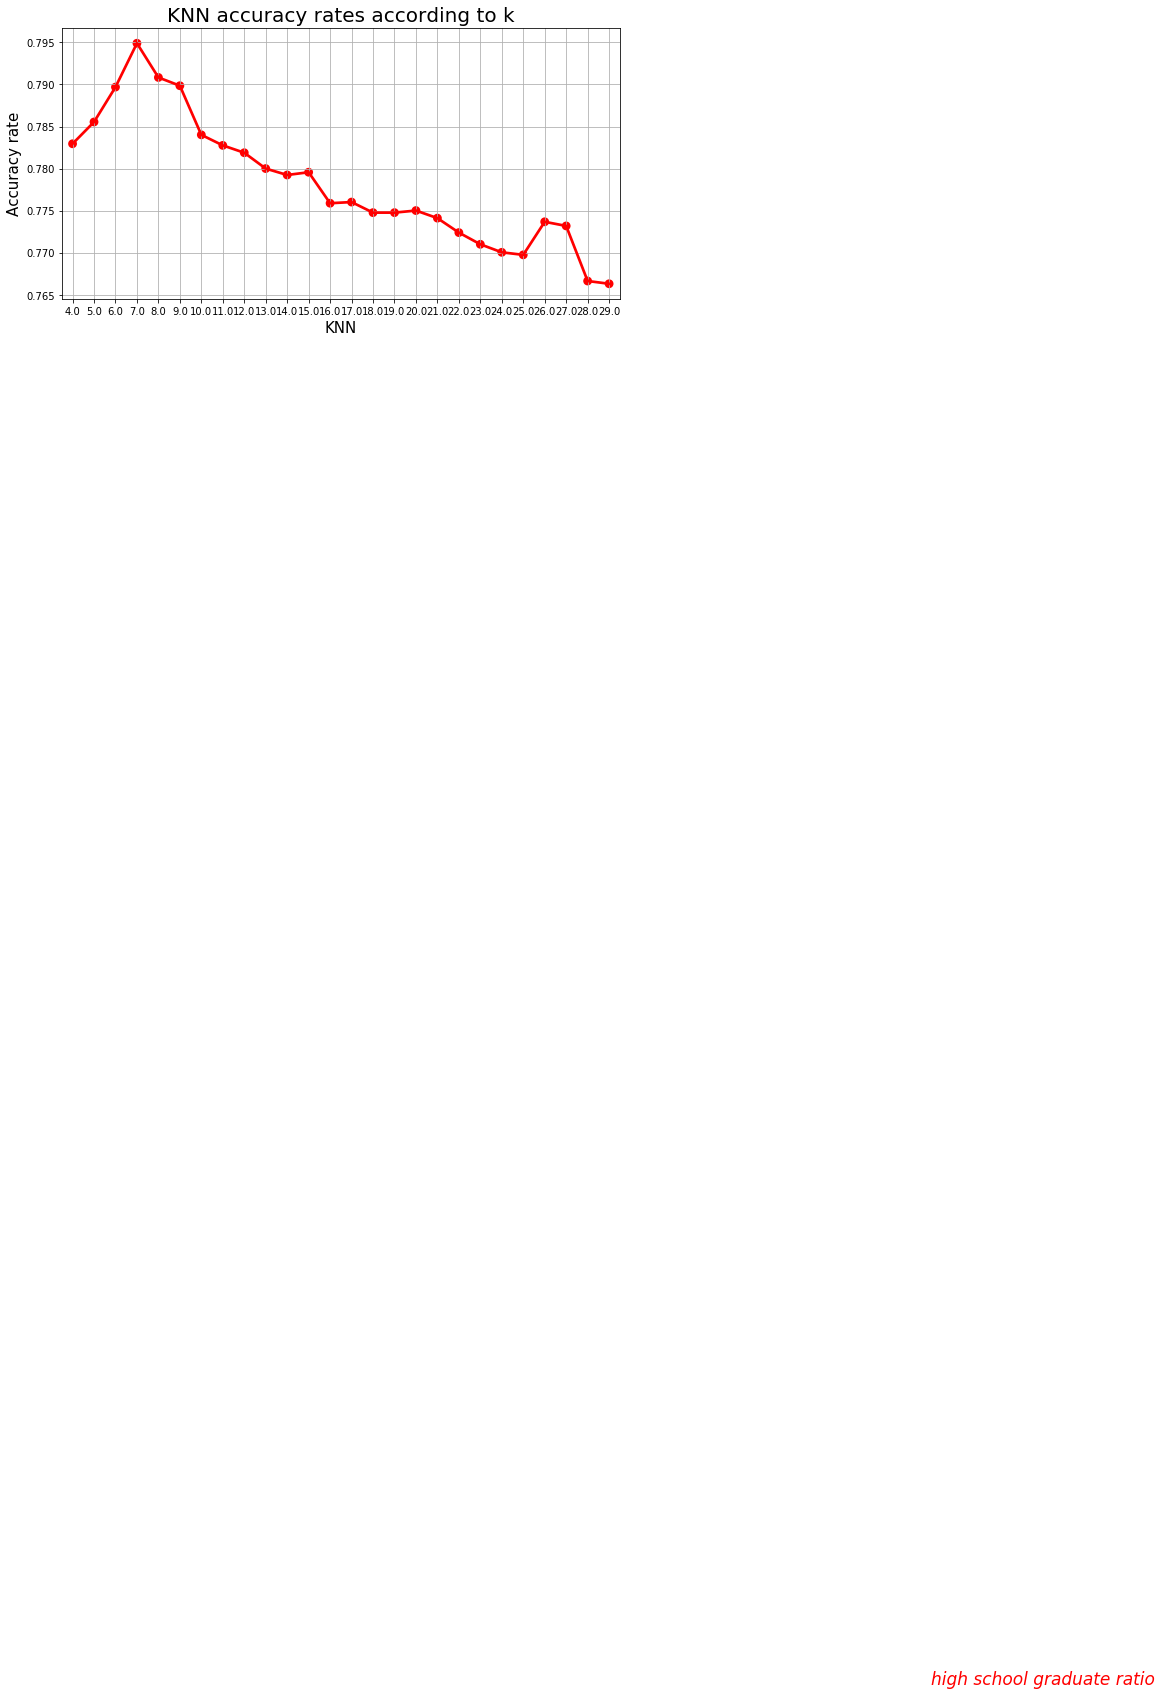

In [74]:
f,ax1 = plt.subplots(figsize =(10,5))
sns.pointplot(x='k',y='scores',data=df.iloc[0:26,0:2],color='red',alpha=0.8)
plt.text(40,0.6,'high school graduate ratio',color='red',fontsize = 17,style = 'italic')
plt.xlabel('KNN',fontsize = 15,color='black')
plt.ylabel('Accuracy rate',fontsize = 15,color='black')
plt.title('KNN accuracy rates according to k',fontsize = 20,color='black')
plt.grid()

In [80]:
#Stochastic Gradient Descent with Cross Validation 
from sklearn.linear_model import SGDClassifier
i=114
sgd = SGDClassifier(loss="modified_huber", penalty="l2", max_iter=i)
cv_accuracy_scores_rf = cross_val_score(sgd, X, target_label.values.ravel(), cv=5,scoring='accuracy')
d1 = {'max_iter': i ,'scores':np.mean(cv_accuracy_scores_rf)}
df1=pd.DataFrame(d1, index=[0])
print(cv_accuracy_scores_rf)
print(i,"SGD Mean 5-Fold R Squared: {}".format(np.mean(cv_accuracy_scores_rf)))
i=115
while i<300:
    sgd = SGDClassifier(loss="modified_huber", penalty="l2", max_iter=i)
    cv_accuracy_scores_rf = cross_val_score(sgd, X, target_label.values.ravel(), cv=5,scoring='accuracy')
    d1 = {'max_iter': i ,'scores':np.mean(cv_accuracy_scores_rf)}
    df1=df.append(d1,ignore_index=True)
    print(cv_accuracy_scores_rf)
    print(i,"SGD Mean 5-Fold R Squared: {}".format(np.mean(cv_accuracy_scores_rf)))
    i=i+1
    
    
    
    
    

[0.69035948 0.67175157 0.71257322 0.72098093 0.76716621]
114 SGD Mean 5-Fold R Squared: 0.7125662802653933
[0.6796024  0.65431762 0.71107479 0.73542234 0.73896458]
115 SGD Mean 5-Fold R Squared: 0.7038763455144206
[0.67619826 0.68932171 0.71802207 0.73446866 0.75286104]
116 SGD Mean 5-Fold R Squared: 0.7141743471793577
[0.66966231 0.67379461 0.71788585 0.7219346  0.65572207]
117 SGD Mean 5-Fold R Squared: 0.6877998876213397
[0.67905773 0.69054753 0.71189211 0.72098093 0.73855586]
118 SGD Mean 5-Fold R Squared: 0.7082068332937582
[0.69403595 0.66140016 0.71107479 0.72997275 0.72997275]
119 SGD Mean 5-Fold R Squared: 0.7052912801388777
[0.68504902 0.66957232 0.70535349 0.74591281 0.73760218]
120 SGD Mean 5-Fold R Squared: 0.7086979647351569
[0.67429194 0.6428766  0.72496935 0.69223433 0.73841962]
121 SGD Mean 5-Fold R Squared: 0.6945583681115266
[0.66489651 0.69163716 0.71230078 0.74114441 0.73487738]
122 SGD Mean 5-Fold R Squared: 0.7089712490151149
[0.68450436 0.67828929 0.71652363 0.7

KeyboardInterrupt: 

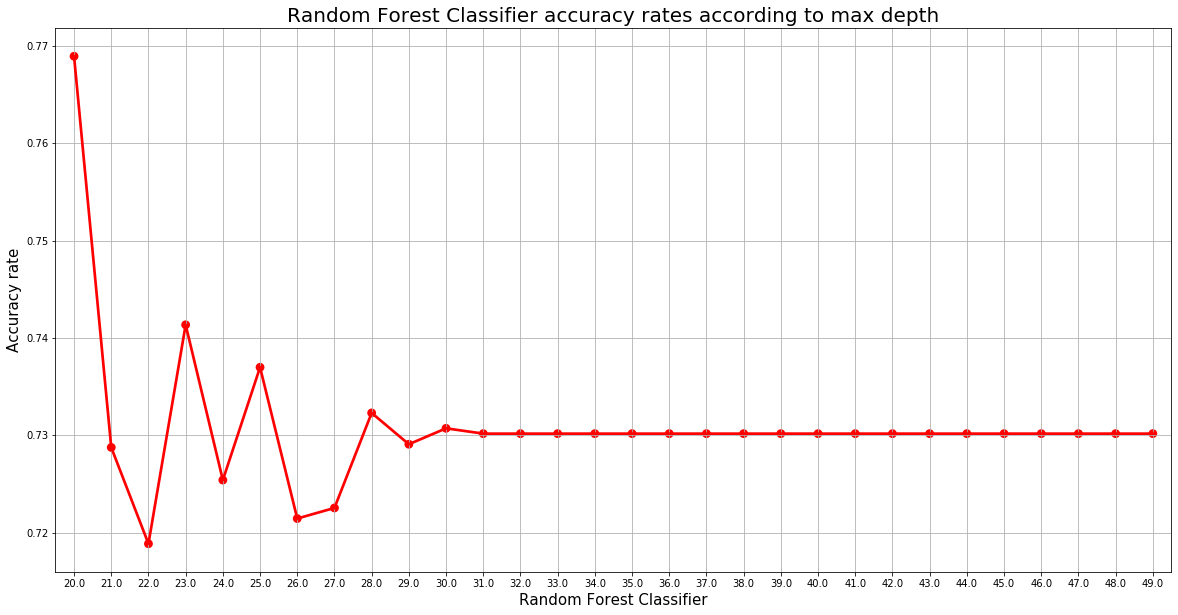

In [29]:
f,ax1 = plt.subplots(figsize =(20,10))
sns.pointplot(x='max_depth',y='scores',data=df1,color='red',alpha=0.8)
plt.text(40,0.6,'',color='red',fontsize = 17,style = 'italic')
plt.xlabel('Random Forest Classifier',fontsize = 15,color='black')
plt.ylabel('Accuracy rate',fontsize = 15,color='black')
plt.title('Random Forest Classifier accuracy rates according to max depth',fontsize = 20,color='black')
plt.grid()

Text(0.5, 1.0, 'Accuracy rates according to methods')

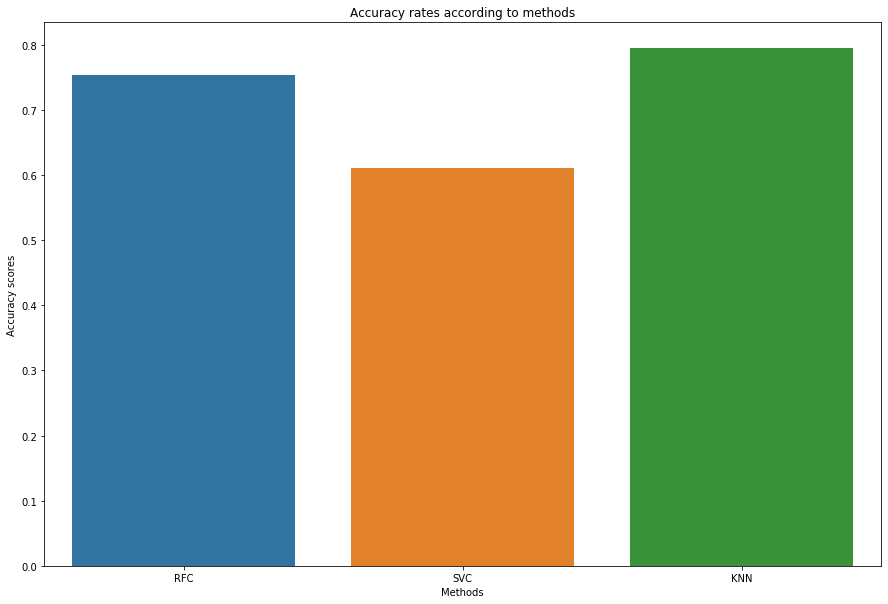

In [41]:
plt.figure(figsize=(15,10))
ax= sns.barplot(x=df.iloc[0:3,0], y=df.iloc[:,1])
plt.xlabel('Methods')
plt.ylabel('Accuracy scores')
plt.title('Accuracy rates according to methods')

In [27]:
#Principal Component Analysis 
from sklearn.decomposition import PCA
pca = PCA(n_components=62)
X_pca = pca.fit_transform(X)
X_pca=pd.DataFrame(X_pca)

In [57]:
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestClassifier
i=20
clf1 = RandomForestClassifier(max_depth=i, random_state=0,n_estimators=5)
cv_accuracy_scores_rf = cross_val_score(clf1, X_pca,target_label.values.ravel() , cv=5,scoring='accuracy')
d1 = {'max_depth': i ,'scores':np.mean(cv_accuracy_scores_rf)}
df1=pd.DataFrame(d1, index=[0])
print(cv_accuracy_scores_rf)
print("Random Forest Classifier Mean 5-Fold accuracy: {}".format(np.mean(cv_accuracy_scores_rf)))
i=21
while i<50:
    clf1 = RandomForestClassifier(max_depth=i, random_state=0,n_estimators=5)
    cv_accuracy_scores_rf = cross_val_score(clf1, X_pca,target_label.values.ravel() , cv=5,scoring='accuracy')
    d1 = {'max_depth': i ,'scores':np.mean(cv_accuracy_scores_rf)}
    df1=df1.append(d1,ignore_index=True)
    print(cv_accuracy_scores_rf)
    print("Random Forest Classifier Mean 5-Fold accuracy: {}".format(np.mean(cv_accuracy_scores_rf)))
    i=i+1


[0.74645969 0.80005448 0.7791854  0.79891008 0.72002725]
Random Forest Classifier Mean 5-Fold accuracy: 0.7689273805684149
[0.74278322 0.83723781 0.80098079 0.81648501 0.72711172]
Random Forest Classifier Mean 5-Fold accuracy: 0.784919711462939
[0.71772876 0.81707981 0.80588476 0.80626703 0.70095368]
Random Forest Classifier Mean 5-Fold accuracy: 0.7695828076452573
[0.7120098  0.80890765 0.79403351 0.826703   0.69972752]
Random Forest Classifier Mean 5-Fold accuracy: 0.7682762973287388
[0.73529412 0.78602561 0.81038006 0.81662125 0.69945504]
Random Forest Classifier Mean 5-Fold accuracy: 0.7695552150479562
[0.74400871 0.78670662 0.77904918 0.82384196 0.70245232]
Random Forest Classifier Mean 5-Fold accuracy: 0.767211757567489
[0.74291939 0.7805775  0.80901784 0.80313351 0.69318801]
Random Forest Classifier Mean 5-Fold accuracy: 0.7657672520326013
[0.74060458 0.8061836  0.78422558 0.81948229 0.69373297]
Random Forest Classifier Mean 5-Fold accuracy: 0.7688458035126595
[0.75054466 0.8075

KeyboardInterrupt: 

In [31]:
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestClassifier
i=1
while i<62:
    clf1 = RandomForestClassifier(max_depth=25, random_state=0,n_estimators=5)
    cv_accuracy_scores_rf = cross_val_score(clf1, X_pca.iloc[:,0:i],target_label.values.ravel() , cv=5,scoring='accuracy')
    print(cv_accuracy_scores_rf)
    print("Random Forest Classifier Mean 5-Fold accuracy: {}".format(np.mean(cv_accuracy_scores_rf)))
    i=i+1


[0.35716231 0.36938164 0.39422422 0.43337875 0.43160763]
Random Forest Classifier Mean 5-Fold accuracy: 0.39715090908072576
[0.54166667 0.54494688 0.56531808 0.61049046 0.64414169]
Random Forest Classifier Mean 5-Fold accuracy: 0.5813127553540833
[0.59272876 0.66998093 0.68028879 0.6859673  0.69032698]
Random Forest Classifier Mean 5-Fold accuracy: 0.663858551343735
[0.64801198 0.72064832 0.69322981 0.7027248  0.66362398]
Random Forest Classifier Mean 5-Fold accuracy: 0.6856477772647166
[0.65890523 0.73426859 0.7375017  0.73760218 0.73678474]
Random Forest Classifier Mean 5-Fold accuracy: 0.7210124888337568
[0.6748366  0.77104331 0.74349544 0.74019074 0.67833787]
Random Forest Classifier Mean 5-Fold accuracy: 0.7215807921398716
[0.68736383 0.77131572 0.76501839 0.77656676 0.68079019]
Random Forest Classifier Mean 5-Fold accuracy: 0.73621097806095
[0.71990741 0.79773904 0.78000272 0.78215259 0.67561308]
Random Forest Classifier Mean 5-Fold accuracy: 0.7510829670183808
[0.72834967 0.8150

In [60]:
from sklearn.neighbors import KNeighborsClassifier
i=1
while i<77:
    knn = KNeighborsClassifier(n_neighbors = i)
    cv_accuracy_scores_rf = cross_val_score(knn, X_pca, target_label.values.ravel(), cv=5,scoring='accuracy')
    print(i,"K Neighbors Classifier Mean 5-Fold accuracy :  {}".format(np.mean(cv_accuracy_scores_rf)))
    i=i+1

1 K Neighbors Classifier Mean 5-Fold accuracy :  0.7897085585283413
2 K Neighbors Classifier Mean 5-Fold accuracy :  0.7794115434692345
3 K Neighbors Classifier Mean 5-Fold accuracy :  0.791370483247466
4 K Neighbors Classifier Mean 5-Fold accuracy :  0.7854042198010932
5 K Neighbors Classifier Mean 5-Fold accuracy :  0.7893000096044058
6 K Neighbors Classifier Mean 5-Fold accuracy :  0.7892451425894083
7 K Neighbors Classifier Mean 5-Fold accuracy :  0.7892995383516771
8 K Neighbors Classifier Mean 5-Fold accuracy :  0.7858119966214497
9 K Neighbors Classifier Mean 5-Fold accuracy :  0.7861115163879872
10 K Neighbors Classifier Mean 5-Fold accuracy :  0.7819696489083102
11 K Neighbors Classifier Mean 5-Fold accuracy :  0.7786187106347641
12 K Neighbors Classifier Mean 5-Fold accuracy :  0.7731702178642965
13 K Neighbors Classifier Mean 5-Fold accuracy :  0.7709360858696748
14 K Neighbors Classifier Mean 5-Fold accuracy :  0.7697373687352489
15 K Neighbors Classifier Mean 5-Fold accura

KeyboardInterrupt: 

In [ ]:
 
i=114
sgd = SGDClassifier(loss="modified_huber", penalty="l2", max_iter=i)
cv_accuracy_scores_rf = cross_val_score(sgd, X_pca, target_label.values.ravel(), cv=5,scoring='accuracy')
d1 = {'max_iter': i ,'scores':np.mean(cv_accuracy_scores_rf)}
df1=pd.DataFrame(d1, index=[0])
print(cv_accuracy_scores_rf)
print(i,"SGD Mean 5-Fold R Squared: {}".format(np.mean(cv_accuracy_scores_rf)))
i=115
while i<300:
    sgd = SGDClassifier(loss="modified_huber", penalty="l2", max_iter=i)
    cv_accuracy_scores_rf = cross_val_score(sgd, X_pca, target_label.values.ravel(), cv=5,scoring='accuracy')
    d1 = {'max_iter': i ,'scores':np.mean(cv_accuracy_scores_rf)}
    df1=df.append(d1,ignore_index=True)
    print(cv_accuracy_scores_rf)
    print(i,"SGD Mean 5-Fold R Squared: {}".format(np.mean(cv_accuracy_scores_rf)))
    i=i+1

In [39]:
from sklearn.naive_bayes import BernoulliNB
gnb = BernoulliNB()
i=1
while i<70:
    cv_accuracy_scores_rf = cross_val_score(gnb, X_pca.iloc[:,0:i] ,target_label.values.ravel(), cv=5,scoring='accuracy')
    print(cv_accuracy_scores_rf)
    print(i,"SGD Mean 5-Fold R Squared: {}".format(np.mean(cv_accuracy_scores_rf)))
    i=i+1

[0.30787037 0.3417325  0.34477592 0.33828338 0.373297  ]
1 SGD Mean 5-Fold R Squared: 0.3411918331772893
[0.38385076 0.43652956 0.4634246  0.51076294 0.54495913]
2 SGD Mean 5-Fold R Squared: 0.46790539818082777
[0.37922113 0.39989104 0.43059529 0.50027248 0.53760218]
3 SGD Mean 5-Fold R Squared: 0.44951642338163306
[0.44784858 0.5509398  0.560959   0.53119891 0.46811989]
4 SGD Mean 5-Fold R Squared: 0.511813236159952
[0.45574619 0.48202125 0.52949189 0.5260218  0.62343324]
5 SGD Mean 5-Fold R Squared: 0.5233428741378876
[0.478622   0.50286026 0.52036507 0.49332425 0.48651226]
6 SGD Mean 5-Fold R Squared: 0.4963367691116504
[0.46922658 0.49863797 0.54924397 0.56975477 0.51185286]
7 SGD Mean 5-Fold R Squared: 0.5197432308927274
[0.48488562 0.47616453 0.545566   0.54250681 0.49673025]
8 SGD Mean 5-Fold R Squared: 0.5091706420286515
[0.50204248 0.47194225 0.55687236 0.55585831 0.52166213]
9 SGD Mean 5-Fold R Squared: 0.5216755060818666
[0.50408497 0.50735494 0.53575807 0.5479564  0.5190735

In [42]:
d2 = {'methods': ['RFC'],'scores':[0.7689]}
df2=pd.DataFrame(d2)
d2 = {'methods': 'SVC','scores':0.641597}
df2=df.append(d2,ignore_index=True)
d2 = {'methods': 'KNN','scores': 0.7683}
df2=df.append(d2,ignore_index=True)


Text(0.5, 1.0, 'Accuracy rates according to methods')

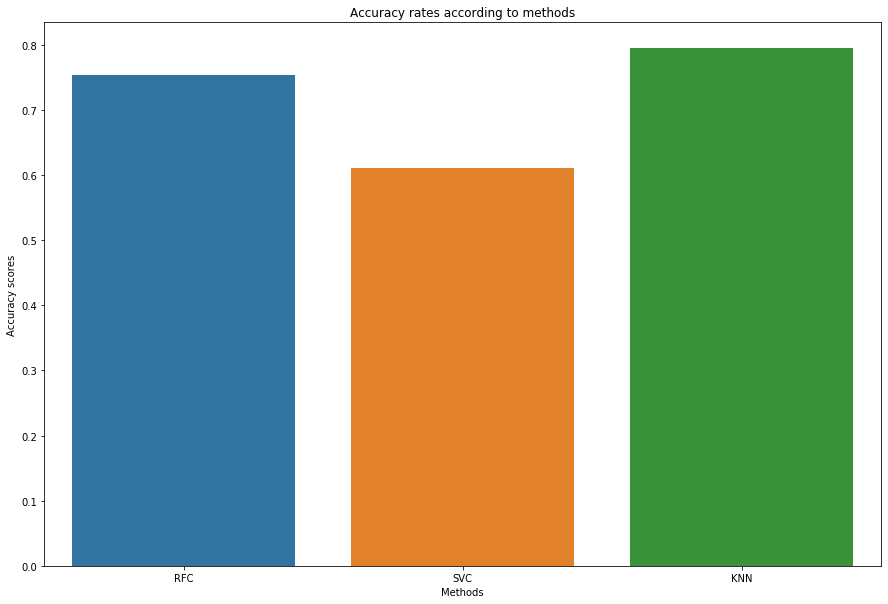

In [43]:
plt.figure(figsize=(15,10))
ax= sns.barplot(x=df.iloc[0:3,0], y=df.iloc[:,1])
plt.xlabel('Methods')
plt.ylabel('Accuracy scores')
plt.title('Accuracy rates according to methods')

In [45]:
df2

,methods,scores
0,RFC,0.753207
1,SVC,0.611277
2,KNN,0.795000
3,SGD,0.727000
4,KNN,0.768300


In [89]:
# prepare data frames

# import graph objects as "go"
import plotly.graph_objs as go
# create trace1 
trace1 = go.Bar(
                x = df1.methods,
                y = df1.scores,
                name = "KNN",
                marker = dict(color = 'rgba(255, 0, 0, 1)',
                             line=dict(color='rgb(0,0,0)',width=1.5)),
                text = df1.methods)
trace3 = go.Bar(
                x = df2.methods,
                y = df2.scores,
                name = "RFC",
                marker = dict(color = 'rgba(0, 256, 0, .8)',
                             line=dict(color='rgb(0,0,0)',width=1.5)),
                text = df2.methods)
# create trace2 
trace2 = go.Bar(
                x = df3.methods,
                y = df3.scores,
                name = "SVC",
                marker = dict(color = 'rgba(0, 0, 256, 1)',
                              line=dict(color='rgb(0,0,0)',width=1.5)),
                text = df3.methods)
data = [trace1,trace3, trace2]
layout = go.Layout(barmode = "group")
fig = go.Figure(data = data, layout = layout)
fig